In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=be-lux------lu-tso-0001entrydistribution,be-lux------lu-tso-0001exittransmissionde-the-----,be-lux------lu-tso-0001exitdistribution,be-lux------lu-tso-0001entrytransmissionde-the-----,be-lux------lu-tso-0001exitfinal%20consumers,be-lux------lu-tso-0001entryfinal%20consumers&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesLUBE-LUX------LU-TSO-0001entryDistr...        1   Aggregates   
1    1AggregatesLUBE-LUX------LU-TSO-0001entryFinal...        1   Aggregates   
2    1AggregatesLUBE-LUX------LU-TSO-0001entryTrans...        1   Aggregates   
3    1AggregatesLUBE-LUX------LU-TSO-0001exitDistri...        1   Aggregates   
4    1AggregatesLUBE-LUX------LU-TSO-0001exitFinal ...        1   Aggregates   
..                                                 ...      ...          ...   
181  1AggregatesLUBE-LUX------LU-TSO-0001entryFinal...        1   Aggregates   
182  1AggregatesLUBE-LUX------LU-TSO-0001entryTrans...        1   Aggregates   
183  1AggregatesLUBE-LUX------LU-TSO-0001exitDistri...        1   Aggregates   
184  1AggregatesLUBE-LUX------LU-TSO-0001exitFinal ...        1   Aggregates   
185  1AggregatesLUBE-LUX------LU-TSO-0001exitTransm...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day     value
0          entry    2         0
1          entry    2         0
2          entry    2         0
3           exit    2  24210234
4           exit    2   9410488
..           ...  ...       ...
181        entry    1         0
182        entry    1         0
183         exit    1  22478681
184         exit    1   8884917
185         exit    1         0

[186 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         0.000000e+00
    exit          1.045453e+07
2   entry         0.000000e+00
    exit          1.120691e+07
3   entry         0.000000e+00
...                        ...
29  exit          6.613588e+06
30  entry         0.000000e+00
    exit          7.483061e+06
31  entry         0.000000e+00
    exit          8.855709e+06

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

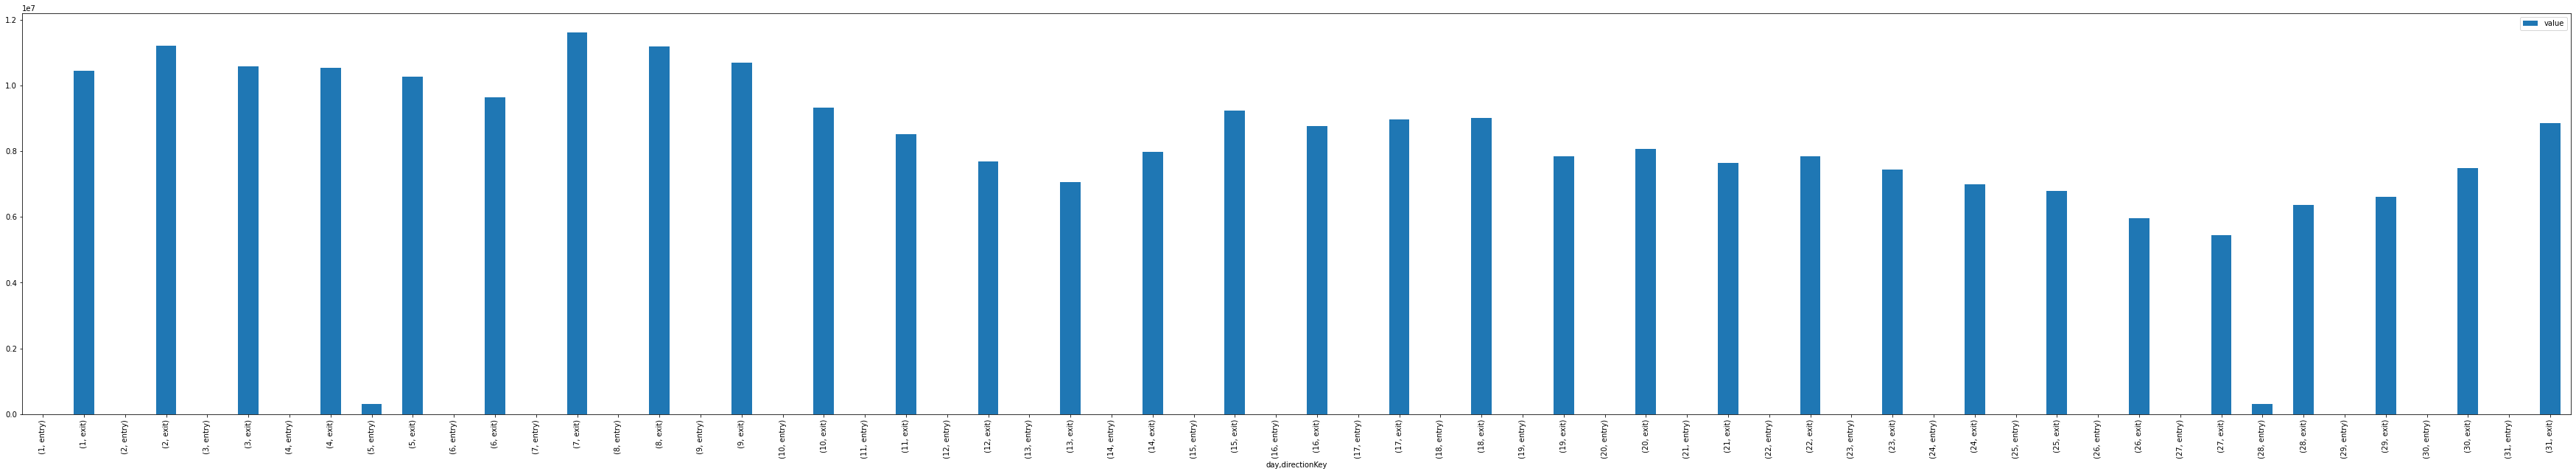

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))